In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
from tqdm import tqdm
from spacy.matcher import Matcher

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv('/content/knowledge_base.csv')

In [ ]:
df.head()

,Filenames,disease,genes,mutations,title,yop,authors,abstract,methods,results
0,PMC104025.txt,Viral Infection,"IkB,IFN-B, NF-kB, IRF-3, IRF-7, ATF-2, c-Jun, ...",S32A/S36A.,IkB-Mediated Inhibition of Virus-Induced Beta ...,1999.0,"Michele Algarate,\nHannah Nguyen,\nChristophe ...",The abstract of the paper describes how the ov...,The main methods used in the study involved th...,The study investigated the effect of overexpre...
1,PMC1171226.txt,Leukemia,Cyclin,Dominant-negative mutations,"""Transcriptional regulation of the cyclin D1 p...",1999.0,"Itaru Matsumura, Toshio Kitamura, Hiroshi Waka...",The paper explores how a protein called STAT5 ...,The main methods employed in the study involve...,The study revealed significant insights into t...
2,PMC1191700.txt,Polyposis,APC,APC mutation,Combined Molecular and Clinical Approaches for...,1999.0,"Johannes F. Gebert, PhD\nCecile Dupon, BS\nMar...",This study aimed to find out more about a cond...,The main methods used in the study involved a ...,The study identified germline mutations in the...
3,PMC1377786.txt,Molybdenum Deficiency,MOCS1 MOCS2,two consecutive open reading frames (ORFs) enc...,Human Molybdopterin Synthase Gene: Identificat...,1999.0,"B. Stallmeyer, G. Drugeon, J. Reiss, A.L. Haen...",he paper identifies a bicistronic transcript f...,The researchers screened a human liver cDNA li...,0
4,PMC1377787.txt,Molybdenum Deficiency,MOCS1 and MOCS2,"Frameshift mutations, start-codon mutation, mi...",Human Molybdopterin Synthase Gene: Genomic Str...,1999.0,"J. Reiss, C. Dorche, B. Stallmeyer, R. R. Mend...",The paper discusses the genomic structure and ...,The study involved clinical characterization o...,The study identified mutations in the MOCS2 ge...


In [ ]:
#len of data
df.shape

(94, 10)

In [ ]:
#feature selection
df.drop(['Filenames'], axis=1, inplace = True)
df.head()

,disease,genes,mutations,title,yop,authors,abstract,methods,results
0,Viral Infection,"IkB,IFN-B, NF-kB, IRF-3, IRF-7, ATF-2, c-Jun, ...",S32A/S36A.,IkB-Mediated Inhibition of Virus-Induced Beta ...,1999.0,"Michele Algarate,\nHannah Nguyen,\nChristophe ...",The abstract of the paper describes how the ov...,The main methods used in the study involved th...,The study investigated the effect of overexpre...
1,Leukemia,Cyclin,Dominant-negative mutations,"""Transcriptional regulation of the cyclin D1 p...",1999.0,"Itaru Matsumura, Toshio Kitamura, Hiroshi Waka...",The paper explores how a protein called STAT5 ...,The main methods employed in the study involve...,The study revealed significant insights into t...
2,Polyposis,APC,APC mutation,Combined Molecular and Clinical Approaches for...,1999.0,"Johannes F. Gebert, PhD\nCecile Dupon, BS\nMar...",This study aimed to find out more about a cond...,The main methods used in the study involved a ...,The study identified germline mutations in the...
3,Molybdenum Deficiency,MOCS1 MOCS2,two consecutive open reading frames (ORFs) enc...,Human Molybdopterin Synthase Gene: Identificat...,1999.0,"B. Stallmeyer, G. Drugeon, J. Reiss, A.L. Haen...",he paper identifies a bicistronic transcript f...,The researchers screened a human liver cDNA li...,0
4,Molybdenum Deficiency,MOCS1 and MOCS2,"Frameshift mutations, start-codon mutation, mi...",Human Molybdopterin Synthase Gene: Genomic Str...,1999.0,"J. Reiss, C. Dorche, B. Stallmeyer, R. R. Mend...",The paper discusses the genomic structure and ...,The study involved clinical characterization o...,The study identified mutations in the MOCS2 ge...


In [ ]:
#check for null values
df.isnull().sum()

disease      61
genes        61
mutations    62
title        61
yop          63
authors      63
abstract     61
methods      61
results      61
dtype: int64

In [ ]:
#remove null value rows
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(29, 9)

In [ ]:
df.head(15)

,disease,genes,mutations,title,yop,authors,abstract,methods,results
0,Viral Infection,"IkB,IFN-B, NF-kB, IRF-3, IRF-7, ATF-2, c-Jun, ...",S32A/S36A.,IkB-Mediated Inhibition of Virus-Induced Beta ...,1999.0,"Michele Algarate,\nHannah Nguyen,\nChristophe ...",The abstract of the paper describes how the ov...,The main methods used in the study involved th...,The study investigated the effect of overexpre...
1,Leukemia,Cyclin,Dominant-negative mutations,"""Transcriptional regulation of the cyclin D1 p...",1999.0,"Itaru Matsumura, Toshio Kitamura, Hiroshi Waka...",The paper explores how a protein called STAT5 ...,The main methods employed in the study involve...,The study revealed significant insights into t...
2,Polyposis,APC,APC mutation,Combined Molecular and Clinical Approaches for...,1999.0,"Johannes F. Gebert, PhD\nCecile Dupon, BS\nMar...",This study aimed to find out more about a cond...,The main methods used in the study involved a ...,The study identified germline mutations in the...
3,Molybdenum Deficiency,MOCS1 MOCS2,two consecutive open reading frames (ORFs) enc...,Human Molybdopterin Synthase Gene: Identificat...,1999.0,"B. Stallmeyer, G. Drugeon, J. Reiss, A.L. Haen...",he paper identifies a bicistronic transcript f...,The researchers screened a human liver cDNA li...,0
4,Molybdenum Deficiency,MOCS1 and MOCS2,"Frameshift mutations, start-codon mutation, mi...",Human Molybdopterin Synthase Gene: Genomic Str...,1999.0,"J. Reiss, C. Dorche, B. Stallmeyer, R. R. Mend...",The paper discusses the genomic structure and ...,The study involved clinical characterization o...,The study identified mutations in the MOCS2 ge...
5,Achondroplasia,Fibroblast Growth Factor Receptor 3 (FGFR3) gene,Lys650Met mutation,A Novel Skeletal Dysplasia with Developmental ...,1999.0,"Patricia L. Tavormina, Gary A. Bellus, Melanie...",The paper identifies a new skeletal dysplasia ...,The researchers conducted genetic analysis on ...,The study pinpointed a novel mutation (Lys650M...
6,Ichthyosis,Keratin K1 (K1) and Keratin K10 (K10,1436T>C and 1435A>T in the K1 gene,Cyclic Ichthyosis with Epidermolytic Hyperkera...,1999.0,"Virginia P. Sybert, Julie S. Francis, Laura D....",The paper discusses a unique clinical disorder...,Skin biopsies were obtained from affected indi...,The study identified mutations in the Keratin ...
7,Dubin-Johnson syndrome,Canalicular Multispecific Organic Anion-Transp...,Mutations in the ATP-Binding-Cassette region o...,Genomic Structure of the Canalicular Multispec...,1999.0,"Satoshi Toh, Morimasa Wada, Takeshi Uchiumi, A...",The paper discusses Dubin-Johnson syndrome (DJ...,The study involved determining the exon/intron...,The paper identifies mutations in the ATP-Bind...
8,Myopathy,chromosome 2q24-q31,Not mentioned,Autosomal Dominant Myopathy with Proximal Weak...,1999.0,"Piero Nicolao, Fengqing Xiang, Lars-Gunnar Gun...",The paper describes the identification of a ge...,Genomic DNA extracted from affected and health...,The study successfully identified a genetic lo...
9,Familial Mediterranean Fever (FMF),MEFV,"missense mutations within the MEFV gene, inclu...",Mutation and Haplotype Studies of Familial Med...,1999.0,"Ivona Aksentijevich, Yelizaveta Torosyan, Jona...",The paper investigates Familial Mediterranean ...,The study utilized mutation and haplotype anal...,The paper identified several missense mutation...


In [ ]:
# text cleaning (lowercase,special characters and punctuation,extra whitespace)
def clean_text(text):
    text = text.lower()
    #text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def cleaning_author(text):
    text = text.replace('\n', '')
    text = text.replace('.', '')
    text = text.replace(' ', '_')
    text = text.replace(',', ' ')

    return text


df['title'] = df['title'].apply(clean_text)
#df['mutations'] = df['mutations'].apply(clean_text)
df['authors'] = df['authors'].apply(cleaning_author)
df['abstract'] = df['abstract'].apply(clean_text)
df['methods'] = df['methods'].apply(clean_text)
df['results'] = df['results'].apply(clean_text)


In [ ]:
df.head()

,disease,genes,mutations,title,yop,authors,abstract,methods,results
0,Viral Infection,"IkB,IFN-B, NF-kB, IRF-3, IRF-7, ATF-2, c-Jun, ...",S32A/S36A.,ikb-mediated inhibition of virus-induced beta ...,1999.0,Michele_Algarate Hannah_Nguyen Christophe_Heyl...,the abstract of the paper describes how the ov...,the main methods used in the study involved th...,the study investigated the effect of overexpre...
1,Leukemia,Cyclin,Dominant-negative mutations,"""transcriptional regulation of the cyclin d1 p...",1999.0,Itaru_Matsumura _Toshio_Kitamura _Hiroshi_Waka...,the paper explores how a protein called stat5 ...,the main methods employed in the study involve...,the study revealed significant insights into t...
2,Polyposis,APC,APC mutation,combined molecular and clinical approaches for...,1999.0,Johannes_F_Gebert _PhDCecile_Dupon _BSMartina_...,this study aimed to find out more about a cond...,the main methods used in the study involved a ...,the study identified germline mutations in the...
3,Molybdenum Deficiency,MOCS1 MOCS2,two consecutive open reading frames (ORFs) enc...,human molybdopterin synthase gene: identificat...,1999.0,B_Stallmeyer _G_Drugeon _J_Reiss _AL_Haenni _a...,he paper identifies a bicistronic transcript f...,the researchers screened a human liver cdna li...,0
4,Molybdenum Deficiency,MOCS1 and MOCS2,"Frameshift mutations, start-codon mutation, mi...",human molybdopterin synthase gene: genomic str...,1999.0,J_Reiss _C_Dorche _B_Stallmeyer _R_R_Mendel _N...,the paper discusses the genomic structure and ...,the study involved clinical characterization o...,the study identified mutations in the mocs2 ge...


In [ ]:
genes_list = df['genes'].tolist()
disease_list = df['disease'].tolist()
mutations_list = df['mutations'].tolist()

In [ ]:
new_df = pd.DataFrame(columns=['source', 'target', 'relation'])
relations = ["gene","mutation","title","author"]

for i, row in df.iterrows():
    disease = row['disease']
    genes = row['genes'].split(',')
    mutations = [row['mutations']]
    title = [row['title']]
    authors = row['authors'].split()

    for j, feature_list in enumerate([genes, mutations, title, authors]):
        for feature in feature_list:
            new_df = new_df.append({'source': feature.strip(), 'target': disease, 'relation': relations[j]}, ignore_index=True)


In [ ]:
new_df.head(20)

,source,target,relation
0,IkB,Viral Infection,gene
1,IFN-B,Viral Infection,gene
2,NF-kB,Viral Infection,gene
3,IRF-3,Viral Infection,gene
4,IRF-7,Viral Infection,gene
5,ATF-2,Viral Infection,gene
6,c-Jun,Viral Infection,gene
7,CREB,Viral Infection,gene
8,HMGI(Y),Viral Infection,gene
9,S32A/S36A.,Viral Infection,mutation


<ipython-input-24-1d5c5b4100a4>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to improve spacing


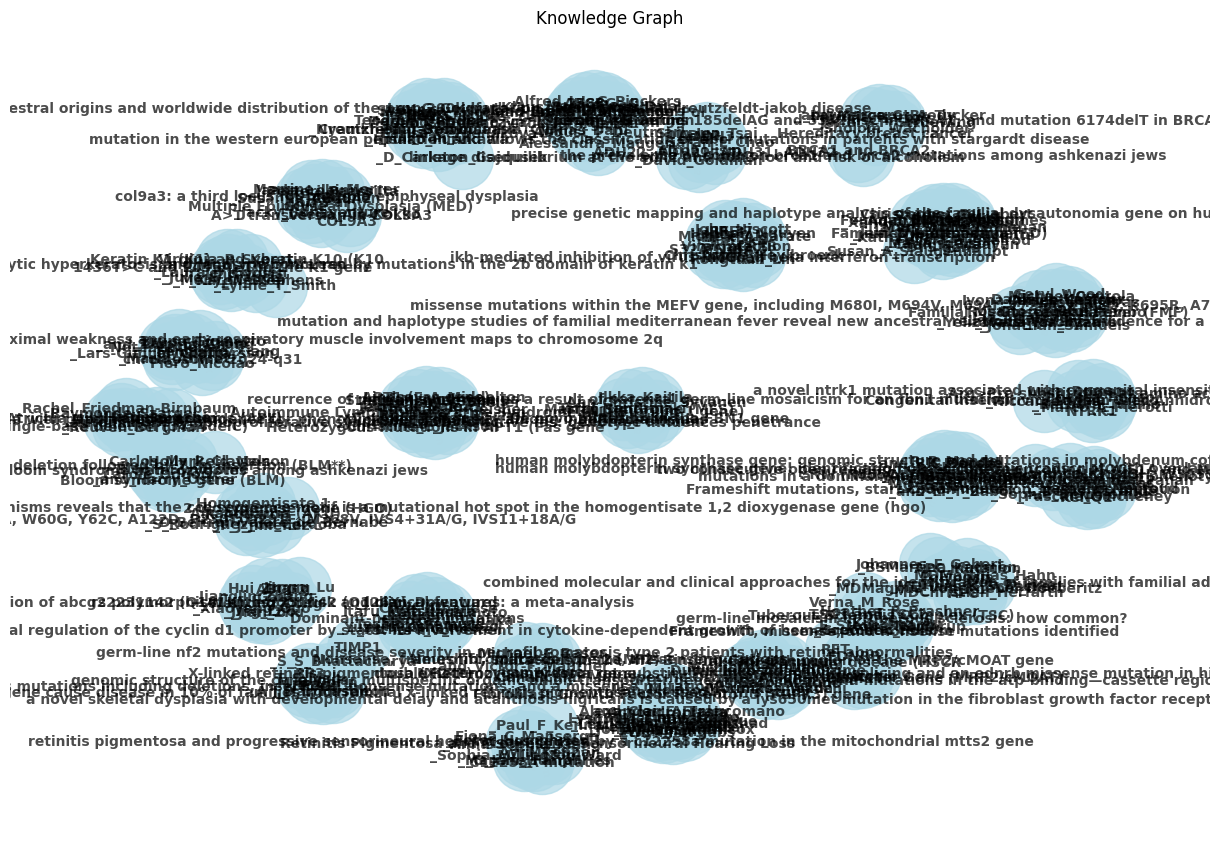

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph based on new_df
for i, row in new_df.iterrows():
    source = row['source']
    target = row['target']
    relation = row['relation']
    G.add_edge(source, target, relation=relation)

# Plot the graph with improved parameters
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Using spring layout with fixed seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Knowledge Graph")
plt.tight_layout()  # Adjust layout to improve spacing
plt.show()


<ipython-input-25-a88769a89fc5>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


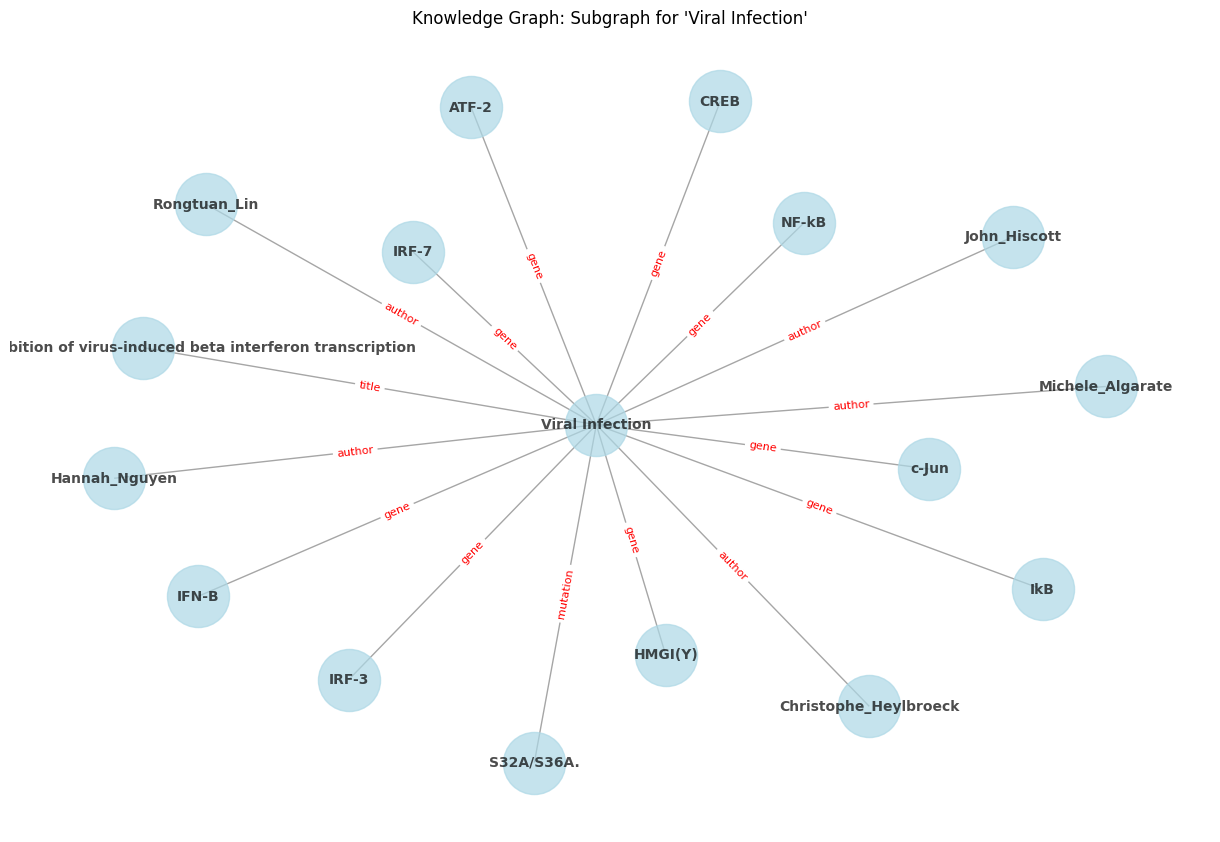

In [ ]:
G = nx.Graph()
for i, row in new_df.iterrows():
    source = row['source']
    target = row['target']
    relation = row['relation']
    G.add_edge(source, target, relation=relation)

subgraph_nodes = [node for node in G.nodes() if node == 'Viral Infection']
subgraph_edges = [(source, target) for source, target in G.edges() if source == 'Viral Infection' or target == 'Viral Infection']
subgraph = G.subgraph(subgraph_nodes + [node for edge in subgraph_edges for node in edge])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(subgraph, 'relation')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Knowledge Graph: Subgraph for 'Viral Infection'")
plt.tight_layout()
plt.show()


<ipython-input-26-618cb21fe662>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


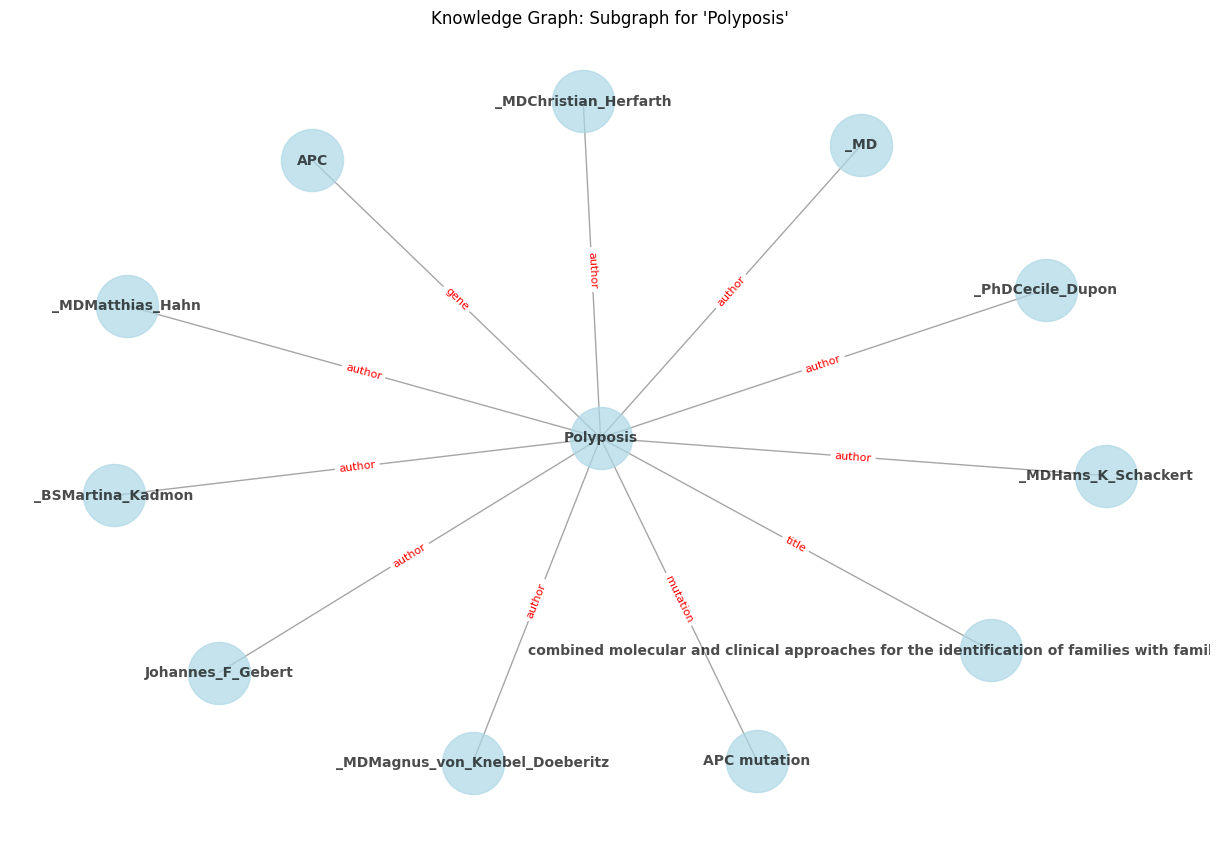

In [ ]:
G = nx.Graph()
for i, row in new_df.iterrows():
    source = row['source']
    target = row['target']
    relation = row['relation']
    G.add_edge(source, target, relation=relation)

subgraph_nodes = [node for node in G.nodes() if node == 'Polyposis']
subgraph_edges = [(source, target) for source, target in G.edges() if source == 'Polyposis' or target == 'Polyposis']
subgraph = G.subgraph(subgraph_nodes + [node for edge in subgraph_edges for node in edge])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(subgraph, 'relation')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Knowledge Graph: Subgraph for 'Polyposis'")
plt.tight_layout()
plt.show()


In [ ]:
print(df['title'][0])
df['abstract'][0]

ikb-mediated inhibition of virus-induced beta interferon transcription


'the abstract of the paper describes how the overexpression of inhibitory proteins ikba and ikbb affects the regulation of beta interferon (ifn-b) gene transcription in human cells following sendai virus infection. the study found that ikba strongly inhibits virus-induced ifn-b expression, while ikbb has a lesser inhibitory effect, particularly at high concentrations. additionally, the study demonstrated that overexpression of a mutated form of ikba completely blocked ifn-b gene activation by sendai virus. this inhibition of ifn-b expression was associated with reduced binding of the nf-kb complex to specific dna regions after virus infection. overall, the findings highlight the significant role of ikba in regulating nf-kb-induced ifn-b gene activation in response to viral infection.'

In [ ]:
df['methods'][0]

'the main methods used in the study involved the generation of plasmids and cell lines, cell culture, transfections, cat reporter gene assays, and western blot analysis. plasmids encoding wild-type human ikba (wtikba), mutated human ikba, and ikbb were constructed and inserted into specific vectors. cell lines expressing these constructs were generated using the calcium phosphate coprecipitation method, and selection of stable cell clones was performed with appropriate antibiotics. transfections were carried out using the calcium phosphate coprecipitation method, and some experiments involved infection with sendai virus. cat reporter gene assays were conducted to assess gene expression levels, and western blot analysis was used to characterize protein expression levels over time. whole-cell extracts were prepared and analyzed by sds-page followed by immunoblotting using specific antibodies against ikba and ikbb. overall, these methods were employed to investigate the regulation of nf-k

In [ ]:
abstract_list = df['abstract'].tolist()
def split_into_sentences(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    return sentences
abstract_sentences = [split_into_sentences(abstract) for abstract in abstract_list]
df.head()

,disease,genes,mutations,title,yop,authors,abstract,methods,results
0,Viral Infection,"IkB,IFN-B, NF-kB, IRF-3, IRF-7, ATF-2, c-Jun, ...",S32A/S36A.,ikb-mediated inhibition of virus-induced beta ...,1999.0,Michele_Algarate Hannah_Nguyen Christophe_Heyl...,the abstract of the paper describes how the ov...,the main methods used in the study involved th...,the study investigated the effect of overexpre...
1,Leukemia,Cyclin,Dominant-negative mutations,"""transcriptional regulation of the cyclin d1 p...",1999.0,Itaru_Matsumura _Toshio_Kitamura _Hiroshi_Waka...,the paper explores how a protein called stat5 ...,the main methods employed in the study involve...,the study revealed significant insights into t...
2,Polyposis,APC,APC mutation,combined molecular and clinical approaches for...,1999.0,Johannes_F_Gebert _PhDCecile_Dupon _BSMartina_...,this study aimed to find out more about a cond...,the main methods used in the study involved a ...,the study identified germline mutations in the...
3,Molybdenum Deficiency,MOCS1 MOCS2,two consecutive open reading frames (ORFs) enc...,human molybdopterin synthase gene: identificat...,1999.0,B_Stallmeyer _G_Drugeon _J_Reiss _AL_Haenni _a...,he paper identifies a bicistronic transcript f...,the researchers screened a human liver cdna li...,0
4,Molybdenum Deficiency,MOCS1 and MOCS2,"Frameshift mutations, start-codon mutation, mi...",human molybdopterin synthase gene: genomic str...,1999.0,J_Reiss _C_Dorche _B_Stallmeyer _R_R_Mendel _N...,the paper discusses the genomic structure and ...,the study involved clinical characterization o...,the study identified mutations in the mocs2 ge...


In [ ]:
#sample nlp tags
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... compound
d823 ... pobj


In [ ]:
#Entity Extraction
def get_entities(sent):
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""
  prv_tok_text = ""

  prefix = ""
  modifier = ""

  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text

  return [ent1.strip(), ent2.strip()]

In [ ]:
#function checking
get_entities("the film had 200 patents")

['film', '200  patents']

In [ ]:
#entity derivation
entity_pairs = []

for abstract in tqdm(abstract_sentences):
  temp=[]
  for sentence in abstract:
    #entity_pairs.append(get_entities(sentence))
    temp.append(get_entities(sentence))
  entity_pairs.append(temp)

100%|██████████| 29/29 [00:01<00:00, 26.63it/s]


In [ ]:
entity_pairs

[[['how  overexpression', 'human sendai virus infection'],
  ['induced ifn b ikbb', 'high  concentrations'],
  ['overexpression', 'completely sendai virus'],
  ['inhibition', 'specific virus infection'],
  ['overall  findings', 'viral b gene infection']],
 [['cyclin which', 'cell growth'],
  ['that', 'immune  responses'],
  ['blocking', 'cyclin d1 expression'],
  ['specific promoter stat5', 'controlling cyclin d1 expression'],
  ['forming blood which', 'certain cell leukemia']],
 [['', 'medical  methods'],
  ['many  which', 'cancer'],
  ['123  85', 'gene'],
  ['mutations', 'different apc disease'],
  ['parts', 'gene'],
  ['patients', 'severe  complications'],
  ['doctors', 'best  treatment'],
  ['using', 'very  fap']],
 [['he', 'small reading subunits'],
  ['discovery', 'sulphite molybdenum oxidase'],
  ['findings', 'genetic moco deficiency']],
 [['paper', 'human deficiency type b.'],
  ['deficiency', 'neurological molybdoenzyme damage'],
  ['mocs2  which', 'likely  deficiency'],
  ['f

In [ ]:
#Relation Extraction function

def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)

    pattern = [{'DEP':'ROOT'},
                {'DEP':'prep','OP':"?"},
                {'DEP':'agent','OP':"?"},
                {'POS':'ADJ','OP':"?"}]

    matcher.add("matching_1", [pattern])

    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]]

    return(span.text)

In [ ]:
#testing
print(get_relation("John completed the task"))

completed


In [ ]:
#relation extraction
relations = []

for abstract in tqdm(abstract_sentences):
  temp=[]
  for sentence in abstract:
    temp.append(get_relation(sentence))
  relations.append(temp)


100%|██████████| 29/29 [00:00<00:00, 29.12it/s]


In [ ]:
relations

[['describes', 'found', 'demonstrated', 'associated with', 'highlight'],
 ['explores', 'found', 'discovered', 'observed', 'sheds'],
 ['study',
  'characterized by',
  'looked at',
  'found in specific',
  'found',
  'were able',
  'discovered',
  'suggest'],
 ['identifies', 'sheds', 'provide'],
 ['discusses', 'leads to', 'identifies', 'support'],
 ['identifies', 'type', 'showed'],
 ['discusses', 'reports on', 'experienced dramatic', 'revealed'],
 ['discusses', 'investigates', 'confirm'],
 ['describes', 'mapped', 'shared'],
 ['investigates familial', 'focuses on', 'identifies several'],
 ['examines', 'associated with', 'assesses'],
 ['exhibits', 'revealed', 'disrupts mitochondrial'],
 ['study', 'revealed', 'suggested maternal', 'evaluated'],
 ['identified in', 'was undetectable', 'suggested maternal'],
 ['characterized by', 'found in', 'investigated'],
 ['cause', 'result in', 'explores'],
 ['investigates', 'suggested', 'proposes'],
 ['is', 'reports'],
 ['is', 'is'],
 ['is', 'narrowed', 

In [ ]:
new_df= pd.DataFrame(columns=['source', 'target', 'relation'])

for i in range(len(entity_pairs)):
    for j in range(len(entity_pairs[i])):
        new_df.loc[len(new_df)] = [entity_pairs[i][j], i, relations[i][j]]

new_df.head(20)

,source,target,relation
0,"[how overexpression, human sendai virus infec...",0,describes
1,"[induced ifn b ikbb, high concentrations]",0,found
2,"[overexpression, completely sendai virus]",0,demonstrated
3,"[inhibition, specific virus infection]",0,associated with
4,"[overall findings, viral b gene infection]",0,highlight
5,"[cyclin which, cell growth]",1,explores
6,"[that, immune responses]",1,found
7,"[blocking, cyclin d1 expression]",1,discovered
8,"[specific promoter stat5, controlling cyclin d...",1,observed
9,"[forming blood which, certain cell leukemia]",1,sheds


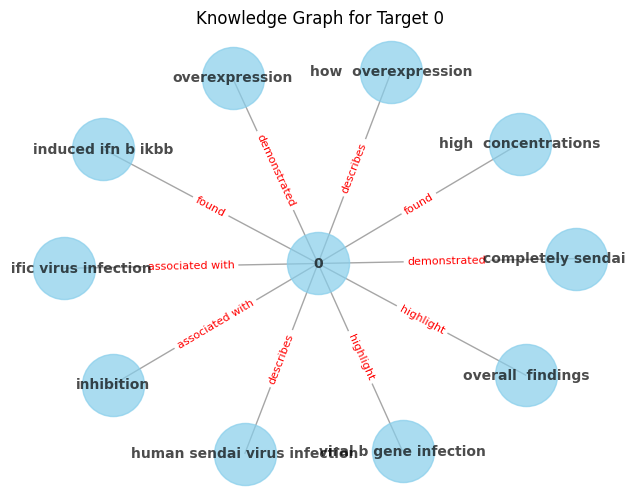

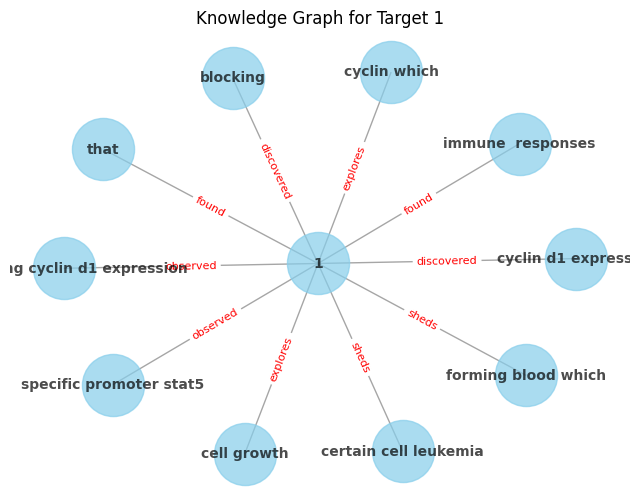

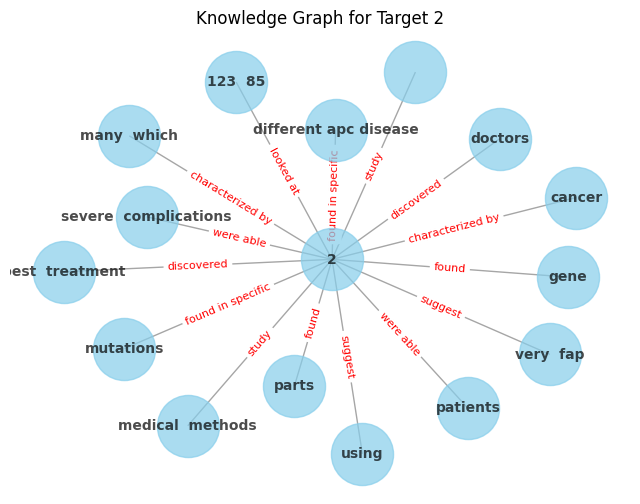

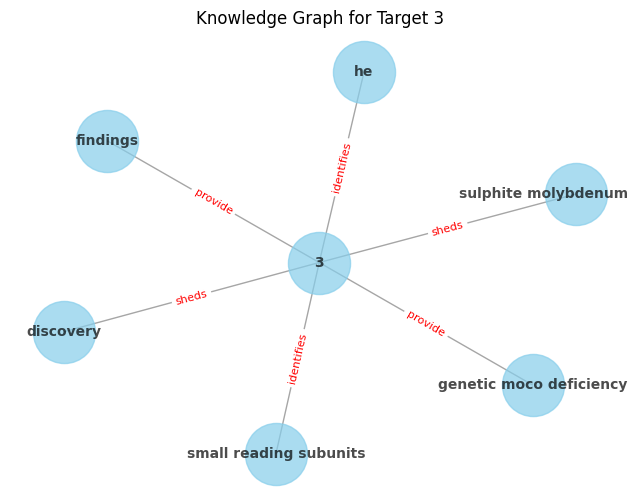

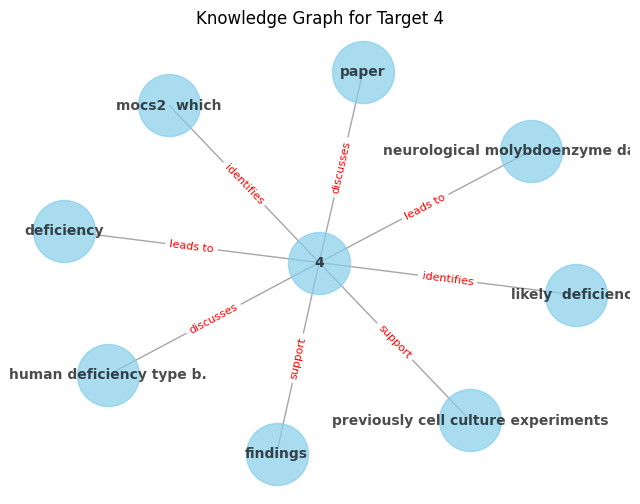

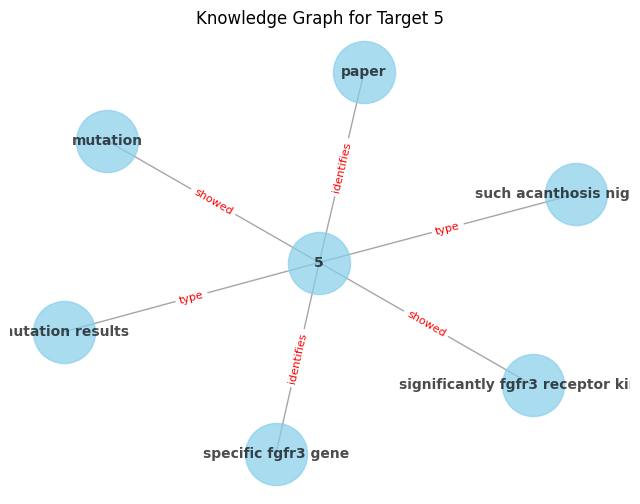

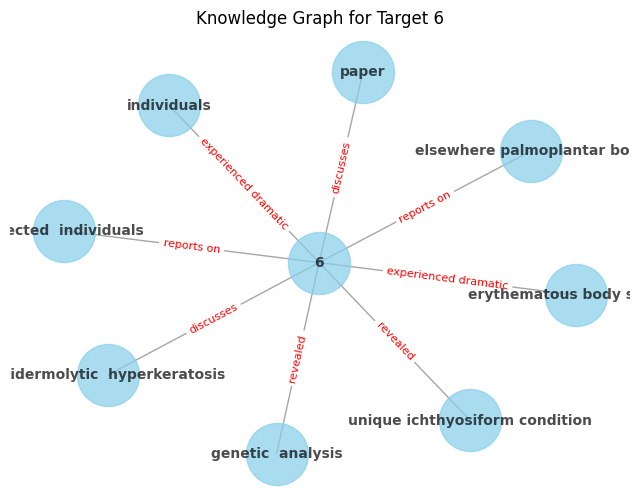

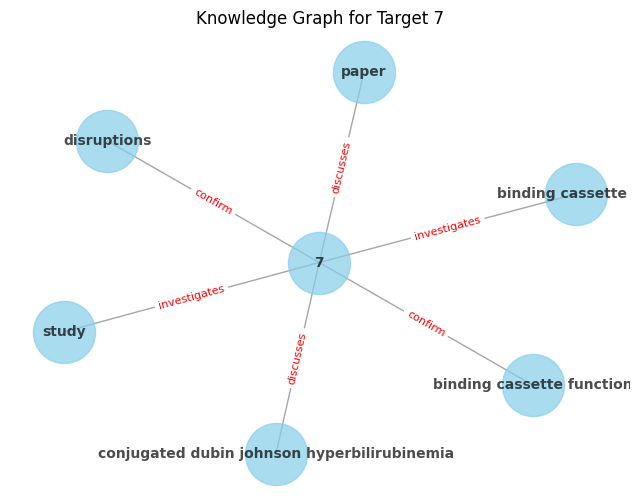

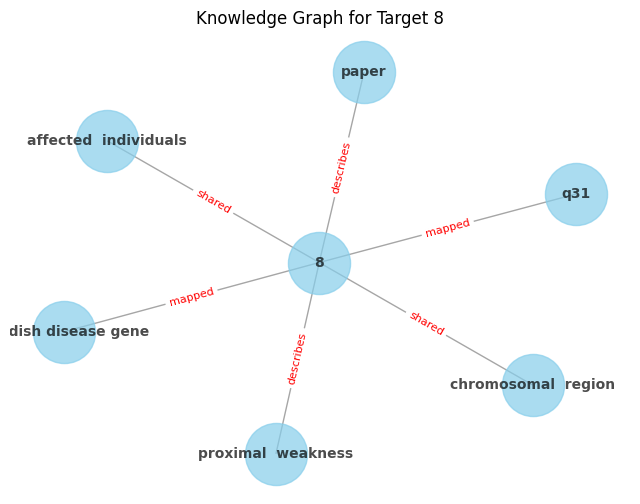

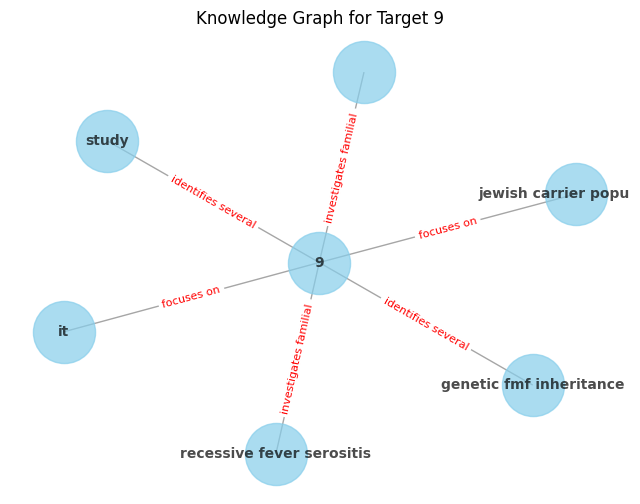

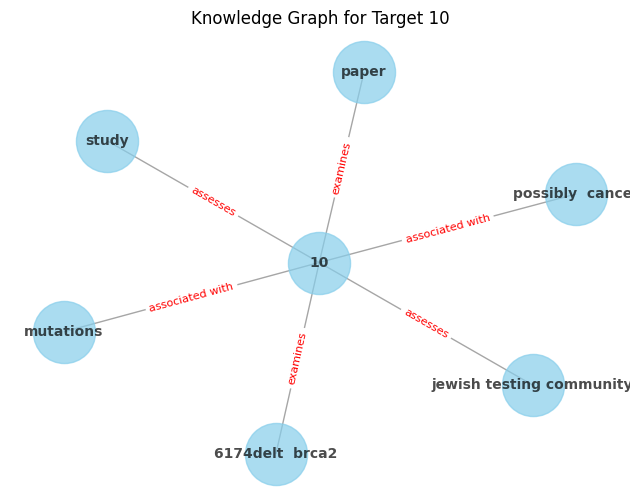

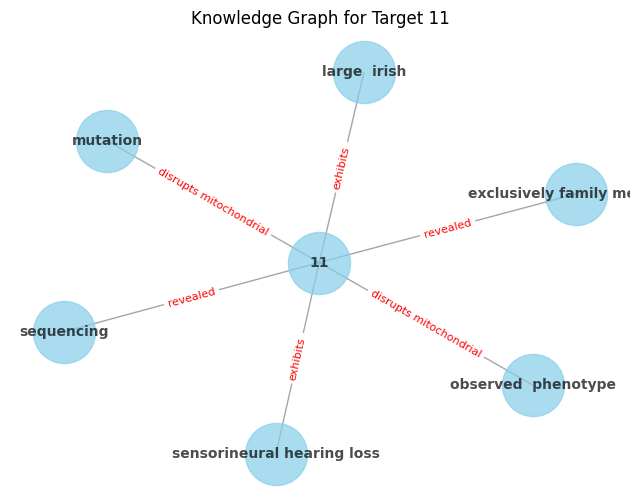

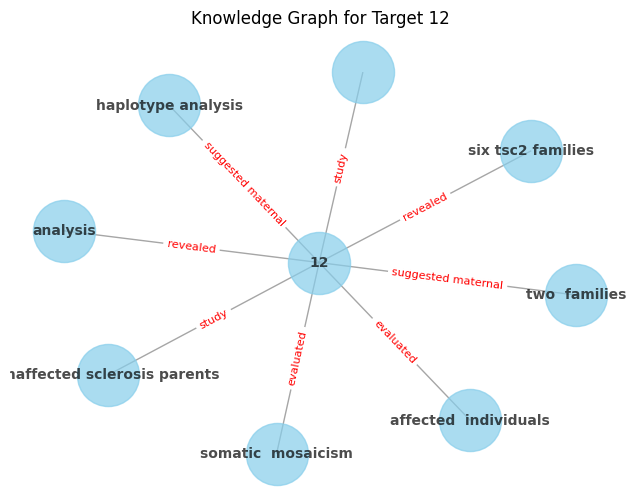

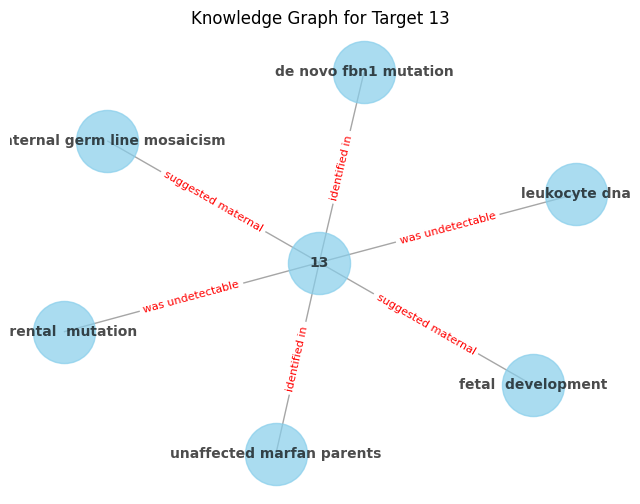

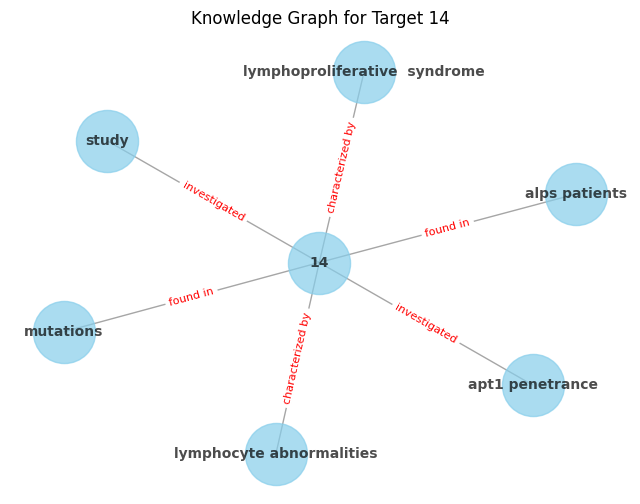

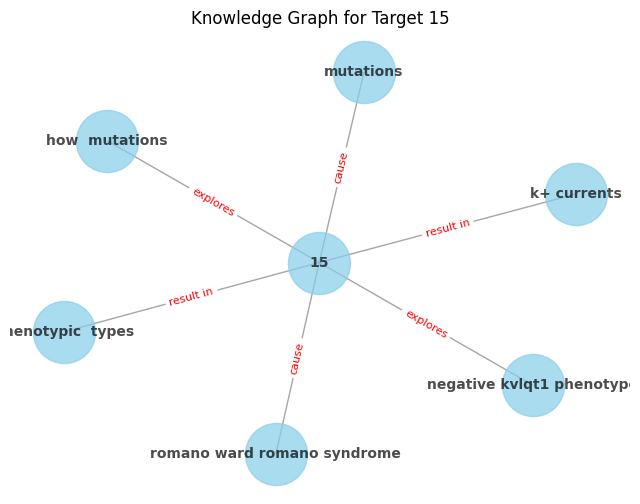

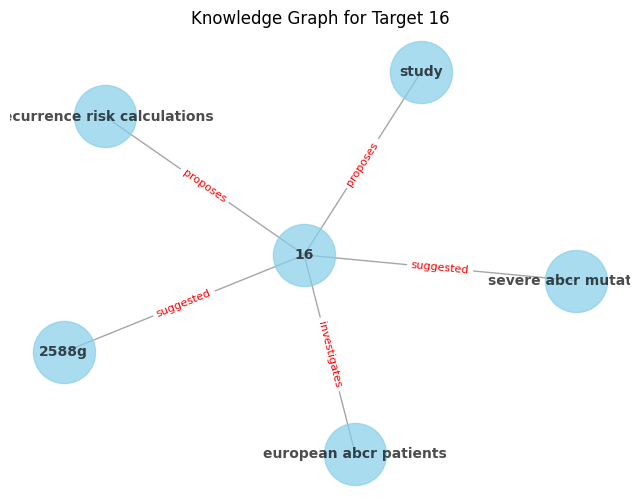

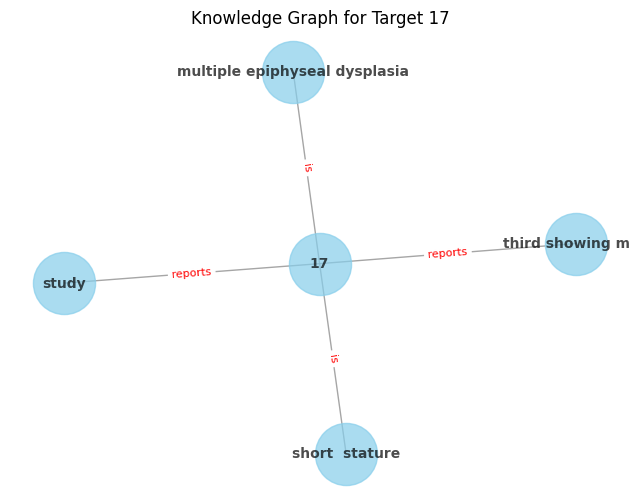

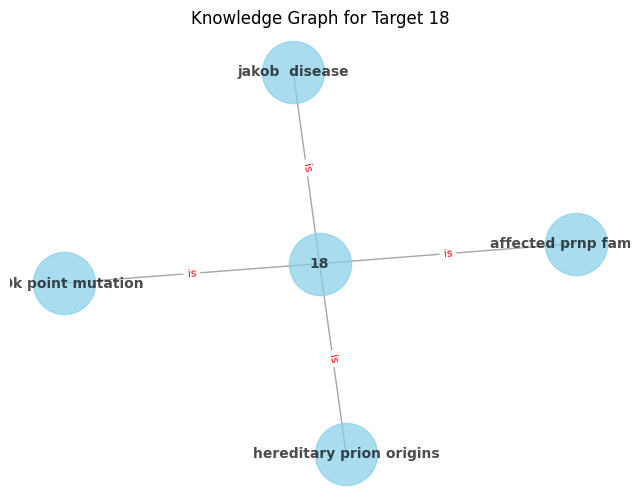

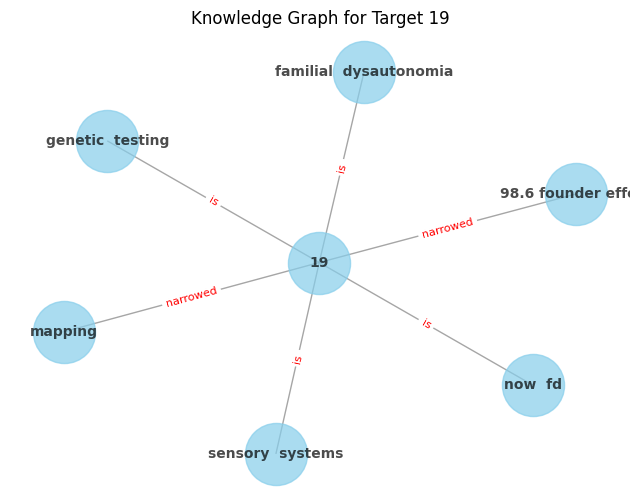

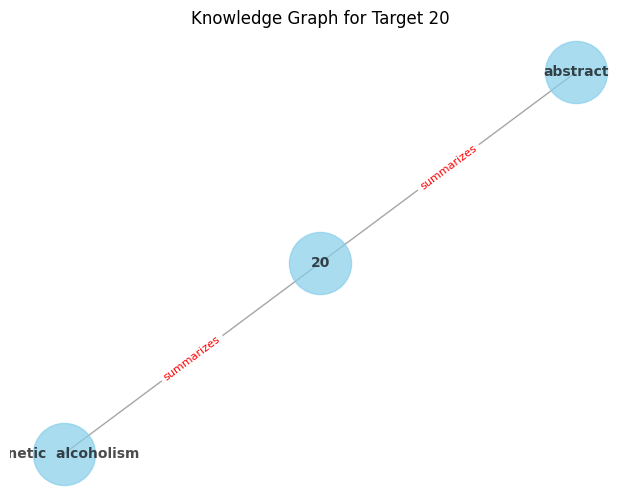

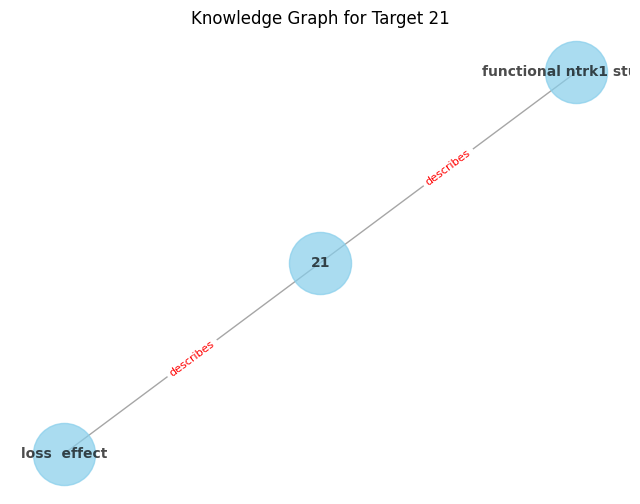

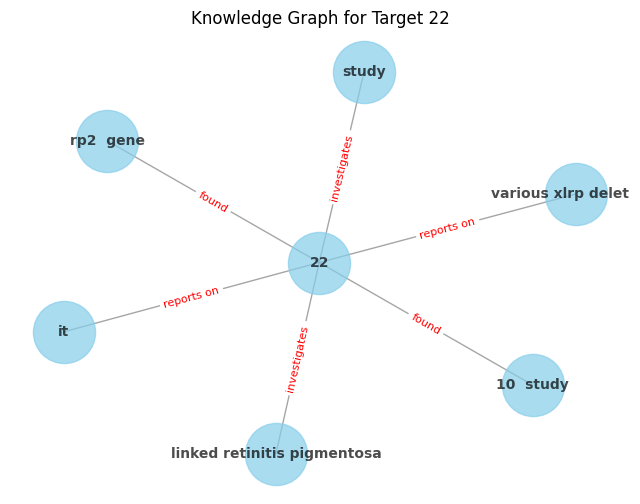

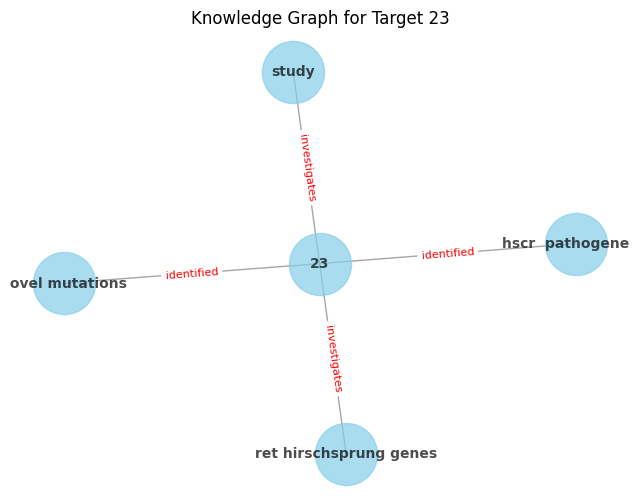

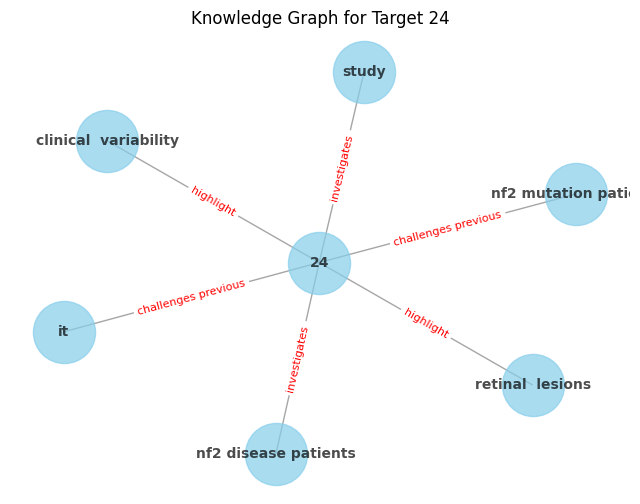

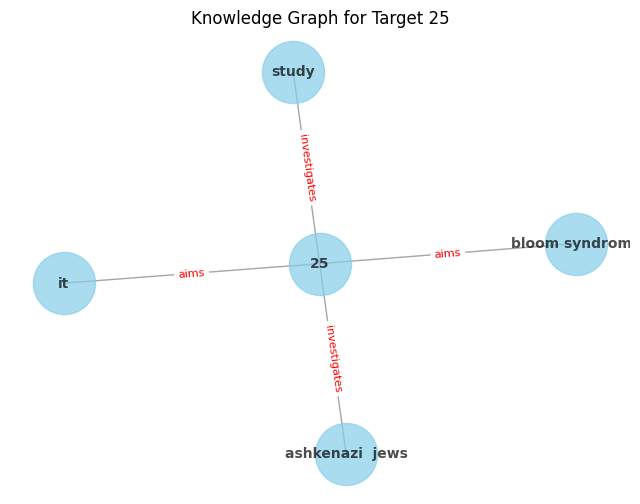

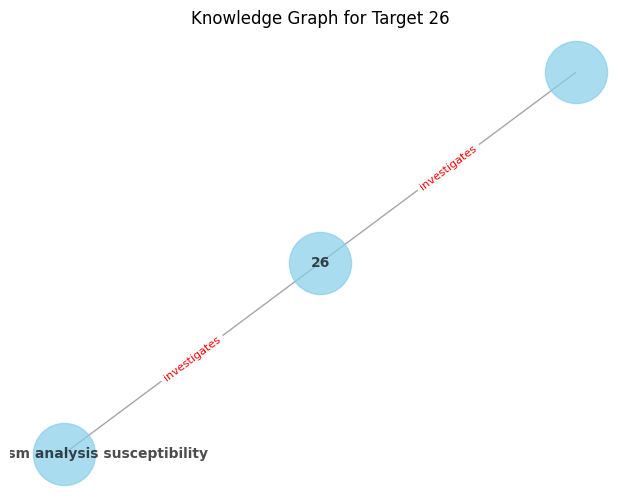

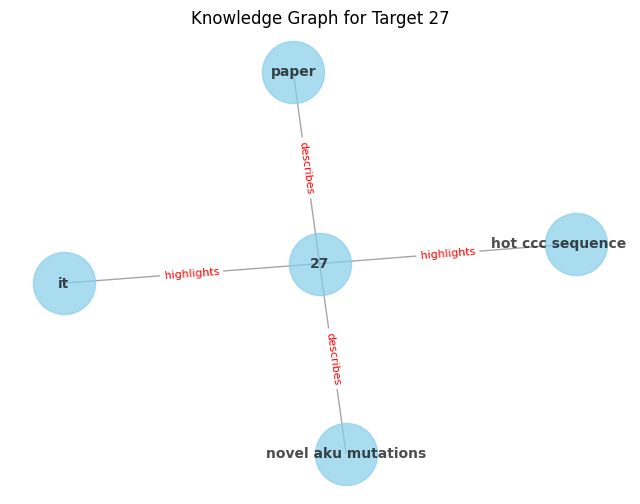

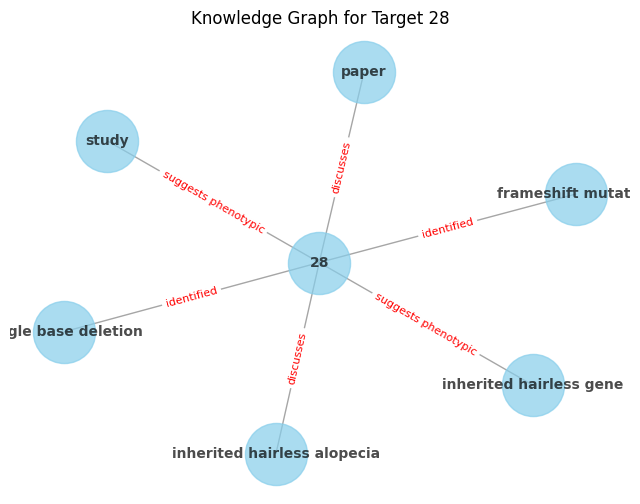

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Function to build knowledge graph for a given target
def build_knowledge_graph(df, target):
    # Filter DataFrame for the given target
    df_target = df[df['target'] == target]

    # Create a new graph
    G = nx.Graph()

    # Add nodes (entities)
    for source, relation in zip(df_target['source'], df_target['relation']):
        for entity in source:
            G.add_node(entity)
            # Connect source entity to the target
            G.add_edge(entity, target, relation=relation)

    return G

# Get unique targets
unique_targets = new_df['target'].unique()

# Build knowledge graphs for each unique target
knowledge_graphs = {}
for target in unique_targets:
    knowledge_graphs[target] = build_knowledge_graph(new_df, target)

# Plotting the knowledge graphs
for target, graph in knowledge_graphs.items():
    plt.figure(figsize=(8, 6))
    plt.title(f"Knowledge Graph for Target {target}")
    pos = nx.spring_layout(graph, seed=42)  # Positioning nodes using spring layout
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red', font_size=8)
    plt.show()


In [ ]:
def generate_for_target(df, target):
    target_rows = df[df['target'] == target]
    for index, row in target_rows.iterrows():
        sentence = f"{row['source'][0]} {row['relation']} {row['source'][1]}"
        print()
        print('\'' + sentence + '\'')

In [ ]:
print('Abstract - Viral Infection')
generate_for_target(new_df, 0)

Abstract - Viral Infection

'how  overexpression describes human sendai virus infection'

'induced ifn b ikbb found high  concentrations'

'overexpression demonstrated completely sendai virus'

'inhibition associated with specific virus infection'

'overall  findings highlight viral b gene infection'
